In [1]:
import zipfile
import numpy as np
import pandas as pd
import matplotlib.cm
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr
import matplotlib.lines as mlines
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import time

import datetime as dt
print("modules imported")


import hw3module as hw3
print("custom hw3module imported")


#save figures as PNG or SVG
#figext ='.png'


plt.style.use('ggplot')

figurepath = "//users/sajudson/Dropbox/WPI/DS504/HW3/figures/"
datapath = "//users/sajudson/Dropbox/WPI/DS504/HW3/zip/"
figext ='.svg'

modules imported
custom hw3module imported


  ## Load data

In [2]:
#load dataframe from CSV file

fpre = "citibikejc_"
interval = ['hourly','daily','monthly']
scope = ['hourly','daily','monthly']

bf_all_h = pd.read_csv(datapath+fpre+interval[0]+"_"+scope[0]+".csv", index_col=0)
bf_sub_h = pd.read_csv(datapath+fpre+interval[0]+"_"+scope[1]+".csv", index_col=0)
bf_cus_h = pd.read_csv(datapath+fpre+interval[0]+"_"+scope[2]+".csv", index_col=0)
bf_all_d = pd.read_csv(datapath+fpre+interval[1]+"_"+scope[0]+".csv", index_col=0)
bf_sub_d = pd.read_csv(datapath+fpre+interval[1]+"_"+scope[1]+".csv", index_col=0)
bf_cus_d = pd.read_csv(datapath+fpre+interval[1]+"_"+scope[2]+".csv", index_col=0)
bf_all_m = pd.read_csv(datapath+fpre+interval[2]+"_"+scope[0]+".csv", index_col=0)
bf_sub_m = pd.read_csv(datapath+fpre+interval[2]+"_"+scope[1]+".csv", index_col=0)
bf_cus_m = pd.read_csv(datapath+fpre+interval[2]+"_"+scope[2]+".csv", index_col=0)

dflist = [bf_all_h, bf_sub_h, bf_cus_h,
          bf_all_d, bf_sub_d, bf_cus_d,
          bf_all_m, bf_sub_m, bf_cus_m]

for df in dflist:
    print(df.shape)

#bf_hour = pd.read_csv(datapath+"bf_hour.csv", index_col=0)
#bf_date = pd.read_csv(datapath+"bf_date.csv", index_col=0)
#bf_month = pd.read_csv(datapath+"bf_month.csv", index_col=0)
bf_all_h.head()

(24253, 17)
(24240, 17)
(4020, 17)
(1068, 17)
(1068, 17)
(490, 17)
(36, 17)
(36, 17)
(21, 17)


,tripduration_min_mean,tripduration_min_max,tripduration_min_sum,start station id_count,start station id_nunique,bikeid_nunique,distance_mean,distance_max,distance_sum,usertype_count,subscriber_sum,customer_sum,speed_mph_mean,distancePerUser,durationPerUser,distancePerBike,durationPerBike
date_hour,,,,,,,,,,,,,,,,,
2015-09-21 14:00:00,7.395833,13.100000,29.583333,4,3,4,0.138968,0.555872,0.555872,4,4,0,1.109279,0.138968,7.395833,0.138968,7.395833
2015-09-21 15:00:00,15.197333,38.733333,379.933333,25,13,21,0.578797,1.378965,14.469915,25,25,0,3.493085,0.578797,15.197333,0.689044,18.092063
2015-09-21 16:00:00,14.247619,37.566667,299.200000,21,14,16,0.810091,2.014926,17.011919,21,21,0,4.149000,0.810091,14.247619,1.063245,18.700000
2015-09-21 17:00:00,7.892667,21.166667,197.316667,25,10,23,0.516572,2.062002,12.914296,25,25,0,4.293618,0.516572,7.892667,0.561491,8.578986
2015-09-21 18:00:00,8.981609,36.983333,520.933333,58,17,49,0.461321,1.330277,26.756594,58,58,0,4.047302,0.461321,8.981609,0.546053,10.631293


In [3]:


for df in dflist:
    df.index  = pd.to_datetime(df.index)

for df in dflist:
    print(df.shape)
    
print('file loaded')
#bf.columns

bf_all_h.head()


#bf.columns


(24253, 17)
(24240, 17)
(4020, 17)
(1068, 17)
(1068, 17)
(490, 17)
(36, 17)
(36, 17)
(21, 17)
file loaded


,tripduration_min_mean,tripduration_min_max,tripduration_min_sum,start station id_count,start station id_nunique,bikeid_nunique,distance_mean,distance_max,distance_sum,usertype_count,subscriber_sum,customer_sum,speed_mph_mean,distancePerUser,durationPerUser,distancePerBike,durationPerBike
date_hour,,,,,,,,,,,,,,,,,
2015-09-21 14:00:00,7.395833,13.100000,29.583333,4,3,4,0.138968,0.555872,0.555872,4,4,0,1.109279,0.138968,7.395833,0.138968,7.395833
2015-09-21 15:00:00,15.197333,38.733333,379.933333,25,13,21,0.578797,1.378965,14.469915,25,25,0,3.493085,0.578797,15.197333,0.689044,18.092063
2015-09-21 16:00:00,14.247619,37.566667,299.200000,21,14,16,0.810091,2.014926,17.011919,21,21,0,4.149000,0.810091,14.247619,1.063245,18.700000
2015-09-21 17:00:00,7.892667,21.166667,197.316667,25,10,23,0.516572,2.062002,12.914296,25,25,0,4.293618,0.516572,7.892667,0.561491,8.578986
2015-09-21 18:00:00,8.981609,36.983333,520.933333,58,17,49,0.461321,1.330277,26.756594,58,58,0,4.047302,0.461321,8.981609,0.546053,10.631293


## Plot key parmeters over time

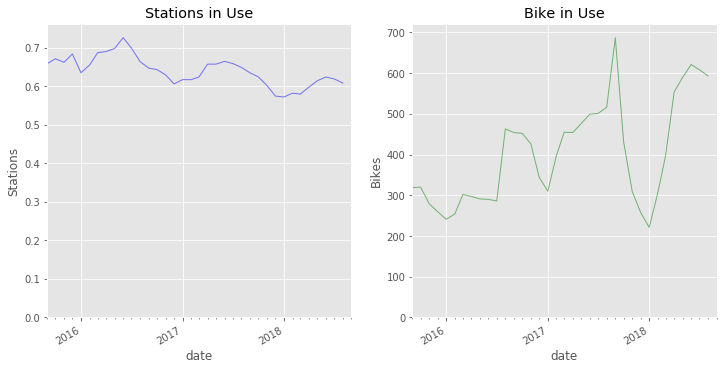

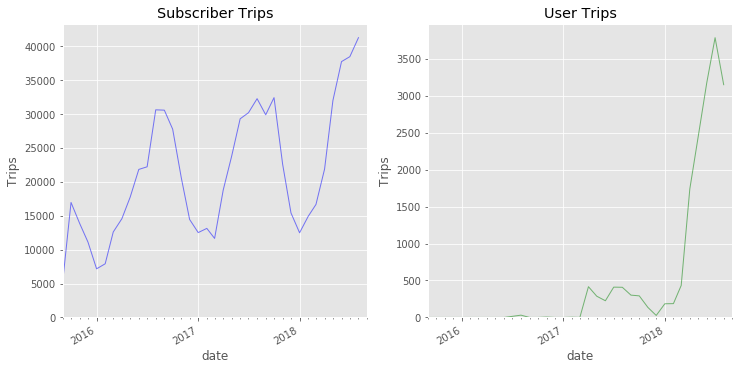

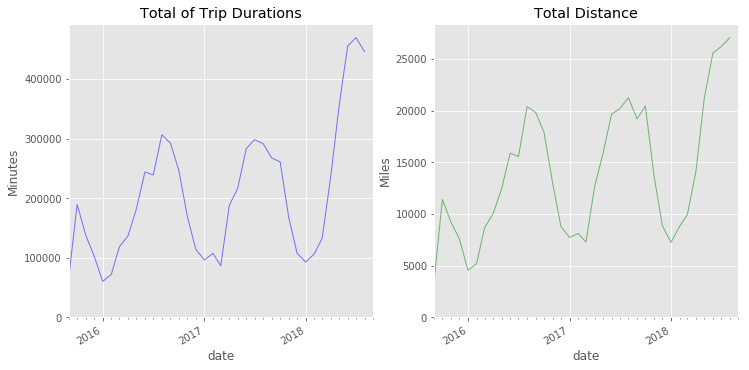

2.59342885017395


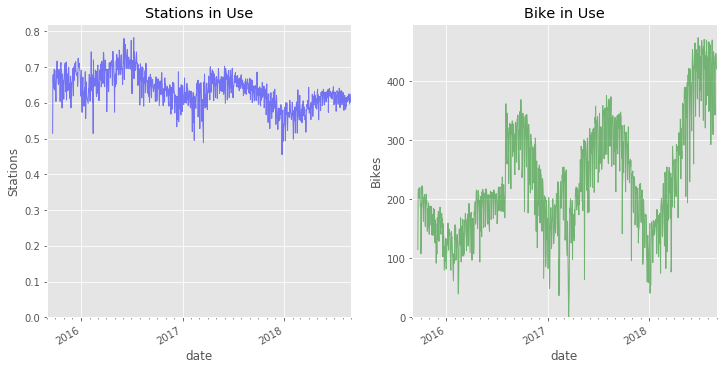

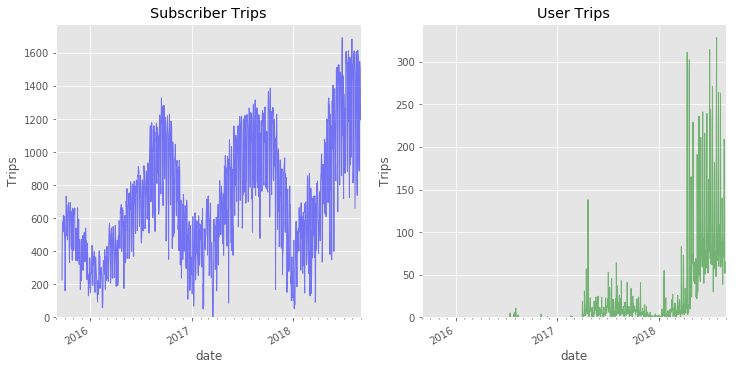

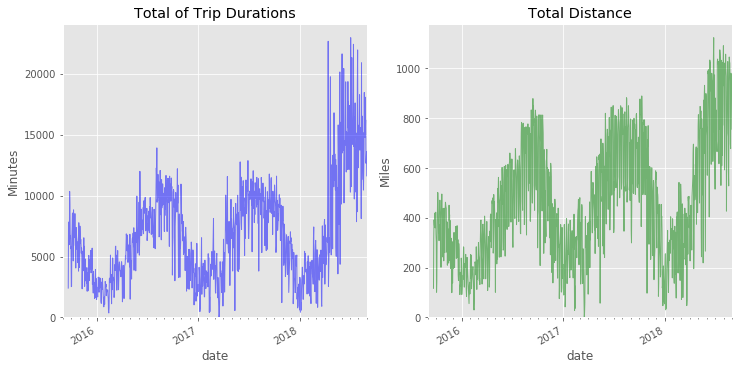

5.295697927474976


In [4]:

chart1Parameters = {'x':'df.index',
                    'xlabel':'date',
                    'y1':'distancePerUser',
                    'y2': 'bikeid_nunique',
                    'title1':'Stations in Use',
                    'title2':'Bike in Use',
                    'y1label':'Stations',
                    'y2label':'Bikes',
                    'filename':"_stations_bikes"
                   }

chart2Parameters = {'x':'df.index',
                    'xlabel':'date',
                    'y1':'subscriber_sum',
                    'y2': 'customer_sum',
                    'title1':'Subscriber Trips',
                    'title2':'User Trips',
                    'y1label':'Trips',
                    'y2label':'Trips',
                    'filename':"_subscribers_customers"
                   }

chart3Parameters = {'x':'df.index',
                    'xlabel':'date',
                    'y1':'tripduration_min_sum',
                    'y2': 'distance_sum',
                    'title1':'Total of Trip Durations',
                    'title2':'Total Distance',
                    'y1label':'Minutes',
                    'y2label':'Miles',
                    'filename':"_tripduration_distance"
                   }
chartlist = [chart1Parameters, chart2Parameters, chart3Parameters]
t0 = time.time()

filepath = "monthly"
plotfunction = hw3.lplotter
hw3.plotChartList(bf_all_m, filepath, plotfunction, chartlist)
t1 = time.time()
print(t1-t0)

filepath = "daily"
hw3.plotChartList(bf_all_d, filepath, plotfunction, chartlist)
t2 = time.time()
print(t2-t0)


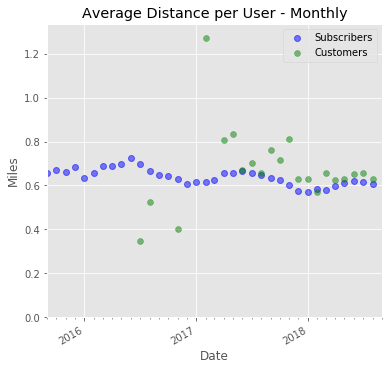

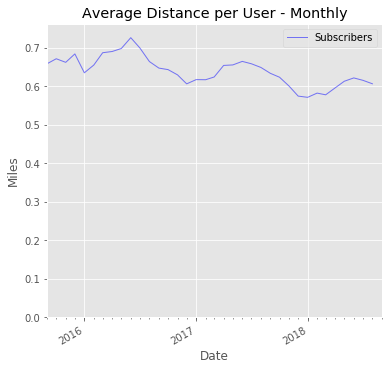

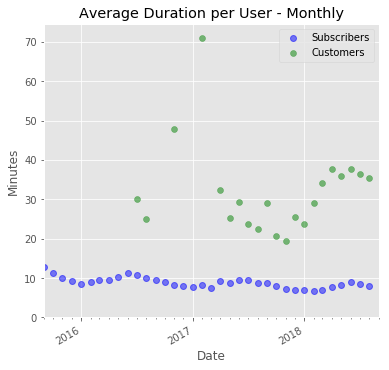

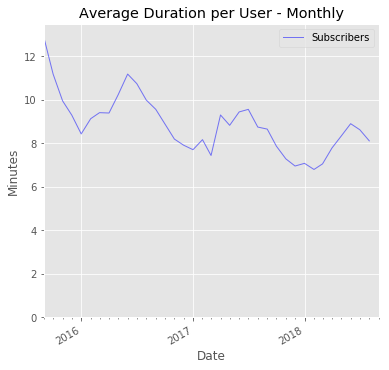

()

In [5]:
dfList = [bf_all_m, bf_sub_m, bf_cus_m]
alphamultiplier = 1
interval = "monthly"

metric = 'distancePerUser'
t1 = "Average Distance per User - Monthly"
xlabel = "Date"
ylabel = "Miles"
filename = interval+"_"+metric+"sc"

x1 = dfList[1].index
x2 = dfList[2].index
y1 = dfList[1][metric]
y2 = dfList[2][metric]

hw3.lplotter2(x1,x2,y1,y2,t1,xlabel,ylabel, filename)


filename = interval+"_"+metric+"s"
hw3.lplotter0(x1,y1,t1,xlabel,ylabel, filename,'line')

metric = 'durationPerUser'
t1 = "Average Duration per User - Monthly"
xlabel = "Date"
ylabel = "Minutes"
filename = interval+"_"+metric+"sc"

x1 = dfList[1].index
x2 = dfList[2].index
y1 = dfList[1][metric]
y2 = dfList[2][metric]

hw3.lplotter2(x1,x2,y1,y2,t1,xlabel,ylabel, filename)

filename = interval+"_"+metric+"s"
hw3.lplotter0(x1,y1,t1,xlabel,ylabel, filename,'line')

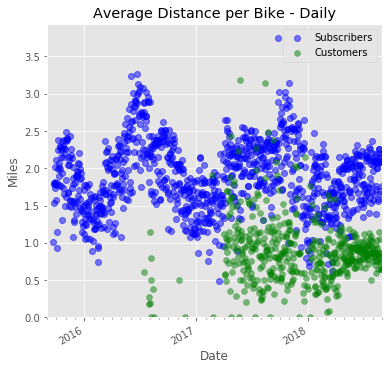

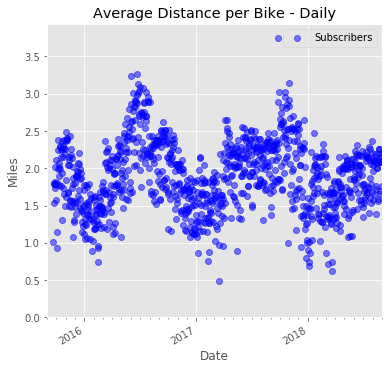

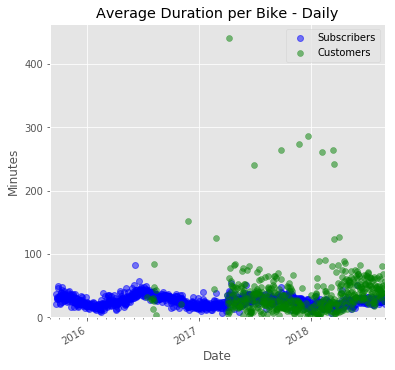

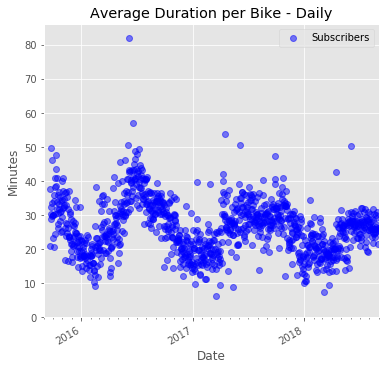

()

In [7]:
#plot more metrics

dfList = [bf_all_d, bf_sub_d, bf_cus_d]

interval = "daily"
alphamultiplier = .25
metric = 'distancePerBike'
t1 = "Average Distance per Bike - Daily"
xlabel = "Date"
ylabel = "Miles"
filename = interval+"_"+metric+"sc"

x1 = dfList[1].index
x2 = dfList[2].index
y1 = dfList[1][metric]
y2 = dfList[2][metric]

hw3.lplotter2(x1,x2,y1,y2,t1,xlabel,ylabel, filename)

filename = interval+"_"+metric+"s"
hw3.lplotter0(x1,y1,t1,xlabel,ylabel, filename)

metric = 'durationPerBike'
t1 = "Average Duration per Bike - Daily"
xlabel = "Date"
ylabel = "Minutes"
filename = interval+"_"+metric+"sc"

x1 = dfList[1].index
x2 = dfList[2].index
y1 = dfList[1][metric]
y2 = dfList[2][metric]

hw3.lplotter2(x1,x2,y1,y2,t1,xlabel,ylabel, filename)

filename = interval+"_"+metric+"s"

hw3.lplotter0(x1,y1,t1,xlabel,ylabel, filename)

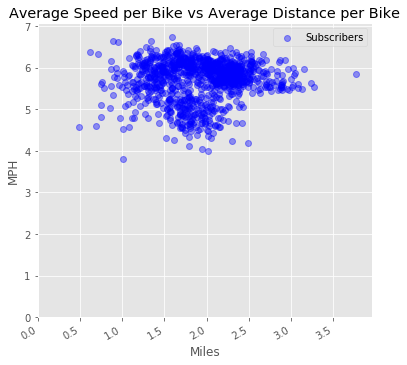

()

In [9]:
metric1 = 'distancePerBike'
metric2 = 'speed_mph_mean'
t1 = "Average Speed per Bike vs Average Distance per Bike"
xlabel = "Miles"
ylabel = "MPH"
filename = interval+"_"+metric1+metric2+"all"

x1 = dfList[0][metric1]
y1 = dfList[0][metric2]
hw3.scatter(x1,y1,t1,xlabel,ylabel, filename)

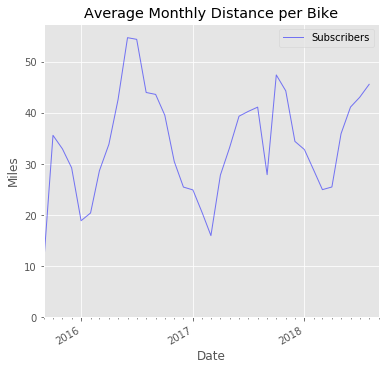

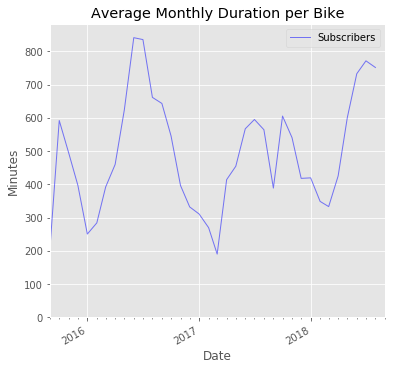

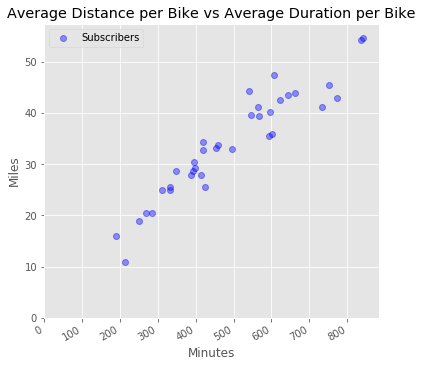

()

In [13]:
dfList = [bf_all_m, bf_sub_m, bf_cus_m]
alphamultiplier = 1
interval = "monthly"

metric = 'distancePerBike'
t1 = "Average Monthly Distance per Bike"
xlabel = "Date"
ylabel = "Miles"
filename = interval+"_"+metric+"all"

x1 = dfList[0].index
y1 = dfList[0][metric]

hw3.lplotter0(x1,y1,t1,xlabel,ylabel, filename,'line')

metric = 'durationPerBike'
t1 = "Average Monthly Duration per Bike"
xlabel = "Date"
ylabel = "Minutes"
filename = interval+"_"+metric+"all"

x1 = dfList[0].index
y1 = dfList[0][metric]

hw3.lplotter0(x1,y1,t1,xlabel,ylabel, filename, 'line')

metric1 = 'durationPerBike'
metric2 = 'distancePerBike'
t1 = "Average Distance per Bike vs Average Duration per Bike"
xlabel = "Minutes"
ylabel = "Miles"
filename = interval+"_"+metric1+metric2+"all"

x1 = dfList[0][metric1]
y1 = dfList[0][metric2]
hw3.scatter(x1,y1,t1,xlabel,ylabel, filename)


In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))

# generate some random test data
all_data = [np.random.normal(0, std, 100) for std in range(6, 10)]

# plot violin plot
axes[0].violinplot(all_data,
                   showmeans=False,
                   showmedians=True)
axes[0].set_title('Violin plot')

# plot box plot
axes[1].violinplot(all_data)
axes[1].set_title('Violin plot 2')

# adding horizontal grid lines
for ax in axes:
    ax.yaxis.grid(True)
    ax.set_xticks([y + 1 for y in range(len(all_data))])
    ax.set_xlabel('Four separate samples')
    ax.set_ylabel('Observed values')

# add x-tick labels
plt.setp(axes, xticks=[y + 1 for y in range(len(all_data))],
         xticklabels=['x1', 'x2', 'x3', 'x4'])
plt.show()



In [ ]:
#GRAPHS


#distribution
#  users by day
#  

#growth over time
#  users
#  bikes
#  stations

#Bike utilization
#  rides/active bikeid by day, by week, by month
#